In [1]:
from llmcoder.utils import get_config_dir, get_system_prompt_dir, get_data_dir
from llmcoder.eval.evaluate import Evaluation

import os
from dynaconf import Dynaconf

In [2]:
config = Dynaconf(settings_files=[os.path.join(get_config_dir(), "plain.yaml")])

In [3]:
eval = Evaluation(config)

In [4]:
results = eval.run(verbose=True)

Evaluation:  32%|███▏      | 31/96 [10:56<17:54, 16.53s/it]

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv(os.path.join(get_data_dir('eval'), os.listdir(get_data_dir('eval'))[0]), index_col=0)

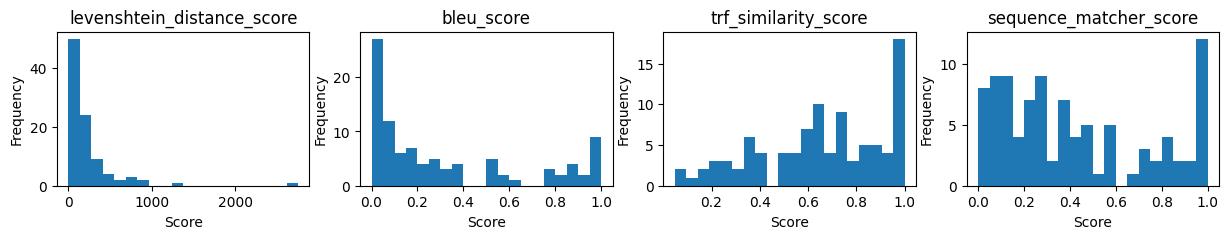

In [17]:
fig, axes = plt.subplots(1, len(df.columns), figsize=(15, 2))

for (col, ax) in zip(df.columns, axes):
    ax.hist(df[col], bins=20)
    ax.set_title(col)
    ax.set_xlabel('Score')
    ax.set_ylabel('Frequency')

In [2]:
from tqdm import tqdm
import time